https://stackoverflow.com/questions/4534480/get-legend-as-a-separate-picture-in-matplotlib

In [2]:
## The following code ensures that all functions and init files are reloaded before executions.
%load_ext autoreload
%autoreload 2

## Test implementation into InSituPy

In [10]:
from insitupy import XeniumData
import napari
import numpy as np

In [5]:
xd = XeniumData("../demo_dataset/cropped_processed/")

In [6]:
xd

XeniumData
Slide ID:	slide_id
Sample ID:	sample_id
Data path:	..\demo_dataset
Data folder:	cropped_processed
Metadata file:	xeniumdata.json

In [7]:
xd.read_images()
xd.read_matrix()

Reading images...
Reading matrix...


In [8]:
xd.show()

In [9]:
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
from matplotlib.backends.backend_qt5agg import FigureCanvas


def colorlegend_mpl(
    colors, labels
    ):
    with plt.style.context('dark_background'):
        handles = [Line2D([0], [0], 
                        marker='o', 
                        color='w', 
                        label=l,
                        markerfacecolor=c, 
                        markeredgewidth=0,
                        linewidth=0,
                        markersize=15) for c, l in zip(colors, labels)]

        fig, ax = plt.subplots(1,1,figsize=(2,2))
        ax.legend(handles=handles, 
                  loc="center", 
                  labelspacing=1, 
                  borderpad=0.5,
                  ncol=1
                  )
        ax.set_axis_off()
    plt.close()
    return fig

In [21]:
xd.show(keys=["leiden"])

In [22]:
layers = xd.viewer.layers
leiden = layers["leiden"]

In [23]:
import numpy as np
from matplotlib.colors import rgb2hex

In [24]:
color_values = leiden.properties['color_value']
face_color = leiden.face_color
labels = sorted(np.unique(color_values))

# create dictionary linking color and labels
color_dict = {i: face_color[np.where(color_values == i)[0][0]] for i in labels}
color_list = [color_dict[l] for l in labels]

In [25]:
clb_fig = colorlegend_mpl(colors=color_list, labels=labels)

In [26]:
# create widget for colorbar
clb_widget = FigureCanvas(clb_fig)
#clb_widget.max_height = 50
# clb_widget.setMaximumHeight(100)
# clb_widget.setMaximumWidth(150)

# add the figure to the viewer as a FigureCanvas widget
xd.viewer.window.add_dock_widget(clb_widget)

In [1]:
from insitupy.palettes import CustomPalettes

In [14]:
palettes = CustomPalettes()
colors = palettes.tab20_mod.colors
color_list = np.random.choice(colors, 5)

In [15]:
clb_fig = colorlegend_mpl(colors=color_list, labels=color_list)

In [17]:
# create widget for colorbar
clb_widget = FigureCanvas(clb_fig)
# add the figure to the viewer as a FigureCanvas widget
#xd.viewer.window.add_dock_widget(clb_widget)

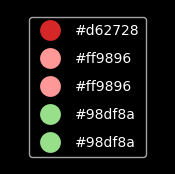

In [20]:
clb_widget.figure = 

In [92]:
line

In [190]:
color_list

array(['#d62728', '#ff9896', '#ff9896', '#98df8a', '#98df8a'], dtype='<U7')

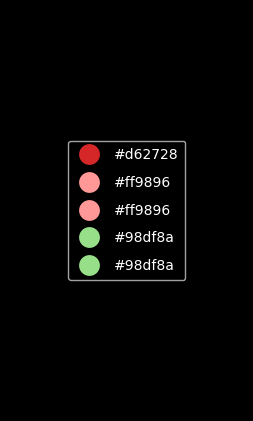

In [93]:
clb_fig

In [178]:
xd.show()

inserted: leiden
here
here
here


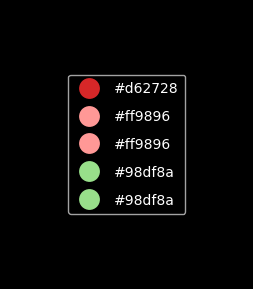

In [184]:
clb_fig

In [185]:
xd.clb_widget.figure = clb_fig

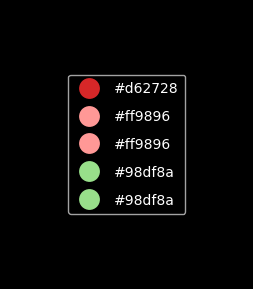

In [186]:
xd.clb_widget.figure

In [188]:
xd.clb_widget.canvas.draw_idle()

AttributeError: 'FigureCanvasQTAgg' object has no attribute 'canvas'

In [189]:
xd.clb_widget

In [180]:
xd.clb_ax.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


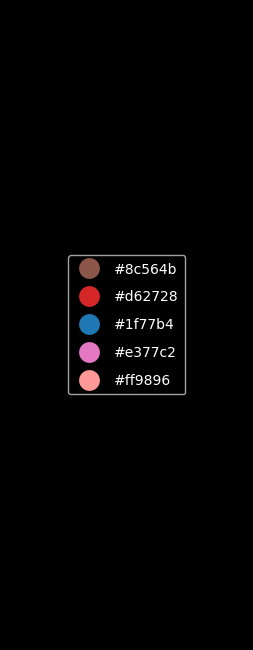

In [177]:
xd.clb_ax.s

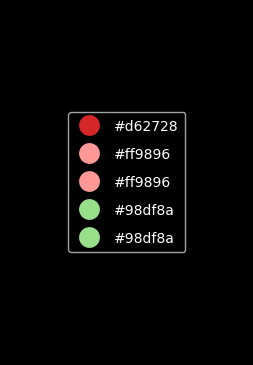

inserted: leiden
here
here
active: leiden
here
active: leiden
here
here
active: HE
here
here
active: HER2
here
here
active: CD20
here
here
active: nuclei
here
here
active: CD20
here
here
active: HER2
here
here
active: leiden
here
here
active: HE
here
here
active: HER2
here
here
active: CD20
here
here
active: nuclei
here
here
active: CD20
here
here
active: HER2
here
here
active: HE
here
here
active: leiden
here
here
active: HER2
here
here
active: CD20
here
here
active: nuclei
here
here
active: HER2
here
here
active: CD20
here
here
active: nuclei
here
here
active: CD20
here
here
active: HER2
here
here
active: HE
here
here
active: leiden
here
here
active: HE
here
here
active: HER2
here
here
active: nuclei
here
here
active: CD20
here
here
active: HER2
here
here
active: HE
here
here
active: leiden
here
here
active: HE
here
here
active: HER2
here
here
active: CD20
here
here
active: HER2
here
here
active: HE
here
here
active: leiden
here
here
active: HE
here
here
active: HER2
here
here
active

In [122]:
clb_fig

In [127]:
xd.viewer.window.clear()

AttributeError: 'Window' object has no attribute 'clear'

In [196]:
import napari
from qtpy.QtWidgets import QLabel, QPushButton, QWidget, QVBoxLayout
from matplotlib.backends.backend_qt5agg import FigureCanvas

viewer = napari.Viewer()

class Mywidget(QWidget):
    def __init__(self, napari_viewer):
        super().__init__()
        self._viewer = napari_viewer
        #self.lbl = QLabel('hey', self)
        self.btn = QPushButton('remove', self)
        self.random = QPushButton('random', self)
        self.shuf = QPushButton('shuffle', self)
        self.btn.clicked.connect(self.remove)
        self.random.clicked.connect(self.add_random_legend)
        self.shuf.clicked.connect(self.shuffle)

        self.build()
        
    def build(self):
        self.vbox = QVBoxLayout()
        #vbox.addWidget(self.lbl)
        self.vbox.addWidget(self.btn)
        self.vbox.addWidget(self.random)
        self.vbox.addWidget(self.shuf)
        #self.vbox.addWidget(FigureCanvas(clb_fig))
        self.setLayout(self.vbox)
        self.show()
    
    def remove(self):
        # I want to delete widget here
        # Then add new widget
        self._viewer.window.remove_dock_widget(self)
        
    def add_random_legend(self):
        # create random colorlegend
        palettes = CustomPalettes()
        colors = palettes.tab20_mod.colors
        color_list = np.random.choice(colors, 5)
        clb_fig = colorlegend_mpl(colors=color_list, labels=color_list)
        self.clb_widget = FigureCanvas(clb_fig)
        self.vbox.addWidget(self.clb_widget)
        
    def shuffle(self):
        # shuffle color legend
        # create random colorlegend
        palettes = CustomPalettes()
        colors = palettes.tab20_mod.colors
        color_list = np.random.choice(colors, 5)
        clb_fig = colorlegend_mpl(colors=color_list, labels=color_list)
        self.clb_widget = FigureCanvas(clb_fig)
        self.clb_widget.figure.canvas.draw()
        self.clb_widget.draw()
        
widget = Mywidget(viewer)
viewer.window.add_dock_widget(widget=widget)

In [198]:
widget.build()

In [170]:
widget.clb_widget = FigureCanvas(clb_fig)

In [171]:
widget.clb_widget.figure.canvas.draw()

In [173]:
widget.clb_widget.draw()

In [149]:
list(viewer.window._dock_widgets.keys())

['Dock widget 1']

In [ ]:
import napari
from qtpy.QtWidgets import QLabel, QPushButton, QWidget, QVBoxLayout

viewer = napari.Viewer()

class Mywidget(QWidget):
    def __init__(self, napari_viewer):
        super().__init__()
        self._viewer = napari_viewer
        self.lbl = QLabel('function', self)
        self.btn = QPushButton('button', self)
        self.btn.clicked.connect(self.func)
        self.build()
        
    def build(self):
        vbox = QVBoxLayout()
        vbox.addWidget(self.lbl)
        vbox.addWidget(self.btn)
        self.setLayout(vbox)
        self.show()
    
    def func(self):
        # I want to delete widget here
        # Then add new widget
        self._viewer.window.remove_dock_widget(self)

viewer.window.add_dock_widget(Mywidget(viewer))

In [115]:
xd.clb_widget.figure = clb_fig

In [113]:
xd.clb_widget.figure.canvas.draw()

In [116]:
xd.clb_widget.draw()

In [ ]:
xd.window

In [ ]:
# connect a callback that updates the line plot when
# the user clicks on the image
@layer.mouse_drag_callbacks.append
def profile_lines_drag(layer, event):
    try:
        line.set_ydata(layer.data[int(event.position[0])])
        line.figure.canvas.draw()
    except IndexError:
        pass

In [32]:
dir(xd.viewer.window)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_menus',
 '_add_plugin_function_widget',
 '_add_theme',
 '_add_viewer_dock_widget',
 '_connect_theme',
 '_disconnect_theme',
 '_dock_widgets',
 '_help_changed',
 '_main_menu_shortcut',
 '_qt_viewer',
 '_qt_window',
 '_remove_dock_widget',
 '_remove_theme',
 '_restart',
 '_screenshot',
 '_setup_existing_themes',
 '_status_bar',
 '_status_changed',
 '_teardown',
 '_title_changed',
 '_toggle_fullscreen',
 '_toggle_menubar_visible',
 '_toggle_play',
 '_unnamed_dockwidget_count',
 '_update_theme',
 '_update_theme_no_event',
 'activate',
 'add_dock_widget',
 'add_function_widget',
 'add_plugin_dock_widget',
 'clipboard',
 

In [26]:
xd.clb_widget

In [39]:
xd.viewer.layers.events.changed

[<Image layer 'nuclei' at 0x1ad97be0b20>, <Image layer 'CD20' at 0x1adb2cfb100>, <Image layer 'HER2' at 0x1adb2d880d0>, <Image layer 'HE' at 0x1adb5866af0>, <Points layer 'leiden' at 0x1adb5b96970>]

In [95]:
l = xd.viewer.layers["leiden"]
he = xd.viewer.layers["HE"]

In [99]:
he.as_layer_data_tuple()[2]

'image'

In [90]:
isinstance(l, napari.layers.points.points.Points)

True

In [94]:
l.as_layer_data_tuple()[2]

'points'

In [86]:
type(l)

napari.layers.points.points.Points

In [79]:
xd.show(keys=["leiden"])

active: HER2
active: HE
active: leiden
active: CD20


In [56]:
xd.viewer.layers.selection.events.active.connect()

TypeError: connect() missing 1 required positional argument: 'callback'

In [67]:
xd.viewer.layers.selection.events.active.source

Selection({<Image layer 'HER2' at 0x1ae1174e610>})

In [52]:
xd.viewer.layers.selection.events.changed.source

Selection({<Image layer 'CD20' at 0x1adb901cb80>})

## Event examples

https://forum.image.sc/t/event-handling-in-napari/46539/2

In [68]:
import napari
from skimage.io import imread
image = imread('https://samples.fiji.sc/blobs.png')

with napari.gui_qt():
    viewer = napari.Viewer()
    viewer.add_image(image)
    viewer.add_image(image)
    viewer.add_image(image)
    viewer.add_image(image)

    def _on_removed(event):
        layer = event.value
        print("removed: " + layer.name)

    viewer.layers.events.removed.connect(_on_removed)

c:\Users\ge37voy\AppData\Local\miniconda3\envs\xparse\lib\contextlib.py:119: FutureWarning: 
The 'gui_qt()' context manager is deprecated.
If you are running napari from a script, please use 'napari.run()' as follows:

    import napari

    viewer = napari.Viewer()  # no prior setup needed
    # other code using the viewer...
    napari.run()

In IPython or Jupyter, 'napari.run()' is not necessary. napari will automatically
start an interactive event loop for you: 

    import napari
    viewer = napari.Viewer()  # that's it!

  return next(self.gen)


removed: image [2]
removed: image [3]


In [46]:
xd.viewer.layers['leiden'].events.data.

SyntaxError: invalid syntax (3761097936.py, line 1)

In [ ]:
# create colorbar
colors = ["crimson", "purple", "gold"]
clb_fig = colorlegend_mpl(colors, colors)

# create widget for colorbar
clb_widget = FigureCanvas(clb_fig)
clb_widget.setMaximumHeight(100)
clb_widget.setMaximumWidth(150)

In [20]:
xd.show(keys=["leiden"])

# add the figure to the viewer as a FigureCanvas widget
xd.viewer.window.add_dock_widget(clb_widget)

RuntimeError: wrapped C/C++ object of type FigureCanvasQTAgg has been deleted

# promising way

In [1]:
import numpy as np
import napari
from skimage import data
from matplotlib.backends.backend_qt5agg import FigureCanvas
from matplotlib.figure import Figure
from matplotlib.lines import Line2D

    
    
blobs_raw = data.binary_blobs(length=64, n_dim=2, volume_fraction=0.1)
viewer = napari.view_image(blobs_raw)

static_canvas = FigureCanvas(Figure(figsize=(5, 3)))
axes = static_canvas.figure.subplots()

colors = ["crimson", "purple", "gold"]

red_circle = [Line2D([0], [0], 
                    marker='o', color='w', label=c,
                    markerfacecolor=c, markersize=15) for c in colors]

axes.legend(handles=red_circle, loc="center", labelspacing=1, borderpad=0.5)
axes.set_axis_off()
viewer.window.add_dock_widget(static_canvas, area='right', name='matplotlib figure')

napari.run()

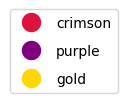

In [71]:
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
colors = ["crimson", "purple", "gold"]

red_circle = [Line2D([0], [0], 
                    marker='o', color='w', label=c,
                    markerfacecolor=c, markersize=15) for c in colors]

fig, ax = plt.subplots(1,1,figsize=(0.1,1))
ax.legend(handles=red_circle, loc="center", labelspacing=1, borderpad=0.5)
ax.set_axis_off()

In [191]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_qt5agg import FigureCanvas

import napari

# create image
x = np.linspace(0, 5, 256)
y = np.linspace(0, 5, 256)[:, np.newaxis]
img = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

# add it to the viewer
viewer = napari.view_image(img, colormap='viridis')
layer = viewer.layers[-1]

# create mpl figure with subplots
mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
(line,) = ax.plot(layer.data[123])  # linescan through the middle of the image

# add the figure to the viewer as a FigureCanvas widget
viewer.window.add_dock_widget(FigureCanvas(mpl_fig))


# connect a callback that updates the line plot when
# the user clicks on the image
@layer.mouse_drag_callbacks.append
def profile_lines_drag(layer, event):
    try:
        line.set_ydata(layer.data[int(event.position[0])])
        line.figure.canvas.draw()
    except IndexError:
        pass


if __name__ == '__main__':
    napari.run()

In [96]:
layer.data.shape

(256, 256)

In [98]:
ax.plot(layer.data[123])

In [103]:
type(clb_fig)

matplotlib.figure.Figure

In [ ]:
plt.legend(handles=color_list, )

In [108]:
plt.legend(color_list, color_list)

C:\Users\ge37voy\AppData\Local\Temp\ipykernel_21448\3353717858.py:1: UserWarning: Legend does not support handles for str_ instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend(color_list, color_list)


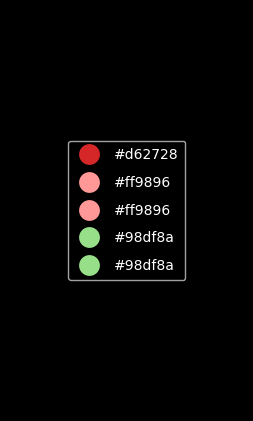

In [107]:
clb_fig

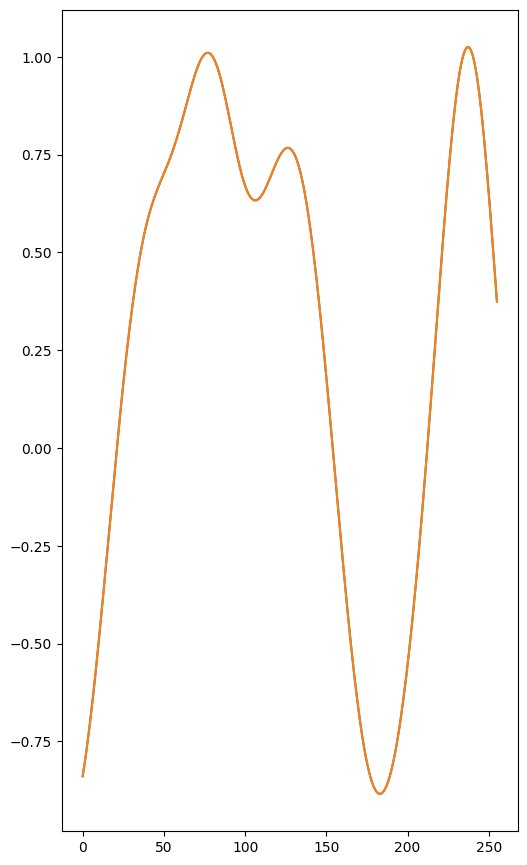

In [100]:
mpl_fig.

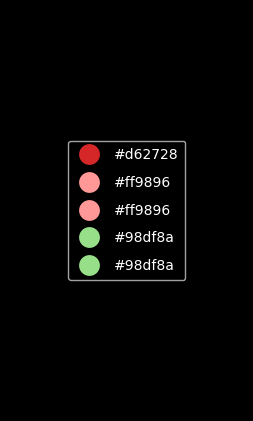

In [99]:
clb_fig

In [58]:
data_tuple = leiden.as_layer_data_tuple()

In [63]:
data_tuple[1]['properties'].keys()

dict_keys(['color_value'])

In [35]:
leiden.face_color_cycle

array([[0.12156863, 0.46666667, 0.7058824 , 1.        ],
       [1.        , 0.49803922, 0.05490196, 1.        ],
       [0.17254902, 0.627451  , 0.17254902, 1.        ],
       [0.8392157 , 0.15294118, 0.15686275, 1.        ],
       [0.5803922 , 0.40392157, 0.7411765 , 1.        ],
       [0.54901963, 0.3372549 , 0.29411766, 1.        ],
       [0.8901961 , 0.46666667, 0.7607843 , 1.        ],
       [0.7372549 , 0.7411765 , 0.13333334, 1.        ],
       [0.09019608, 0.74509805, 0.8117647 , 1.        ],
       [0.68235296, 0.78039217, 0.9098039 , 1.        ],
       [1.        , 0.73333335, 0.47058824, 1.        ],
       [0.59607846, 0.8745098 , 0.5411765 , 1.        ],
       [1.        , 0.59607846, 0.5882353 , 1.        ],
       [0.77254903, 0.6901961 , 0.8352941 , 1.        ],
       [0.76862746, 0.6117647 , 0.5803922 , 1.        ],
       [0.96862745, 0.7137255 , 0.8235294 , 1.        ],
       [0.85882354, 0.85882354, 0.5529412 , 1.        ],
       [0.61960787, 0.85490197,

In [8]:
layers["leiden"]

<Points layer 'leiden' at 0x182a82bd0d0>

In [16]:
layers.

In [23]:
xd.viewer.dims

Dims(ndim=2, ndisplay=2, last_used=0, range=((0.0, 1791.1625, 0.2125), (0.0, 2691.247886548464, 0.2125)), current_step=(4214, 6331), order=(0, 1), axis_labels=('0', '1'))